<a href="https://colab.research.google.com/github/soumendra/cnn-visualisation/blob/vijendra/MNIIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import keras
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## Load Data

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Visualize image sample

8


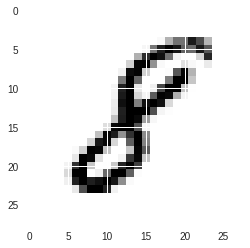

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

## Data Preprocessing

In [71]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Input shape

In [72]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

## Base model

In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

## Model training

In [74]:
import timeit
startTime = timeit.default_timer()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)
elapsedTime = timeit.default_timer() - startTime

print(elapsedTime)

Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.2035 - acc: 0.9387
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0827 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0569 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0422 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0338 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0283 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0242 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0215 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0184 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 11s 188us/step - loss: 

In [76]:

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/step


[0.05861032286879818, 0.9862]

## Accuracy

In [0]:
model accuracy = 98.62%